# Prespective Transform Example

In [8]:
# imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

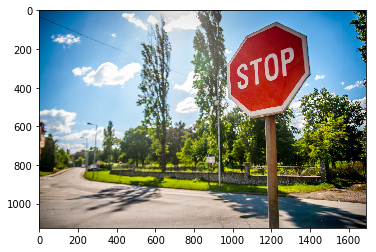

In [9]:
# read image
image = mpimg.imread('stop-sign.jpg')
plt.imshow(image)

**We need to manually create four points on the original source image and destination image**

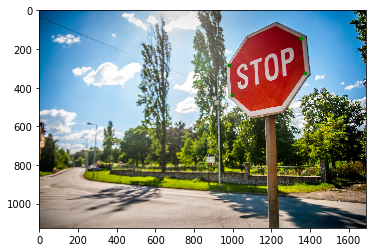

In [11]:
plt.imshow(image)
plt.plot(1354, 142, '.g')
plt.plot(1373, 322, '.g')
plt.plot(994, 436, '.g')
plt.plot(981, 283, '.g')

In [15]:
# define prespective transform function
def warp(img):
    # define calibration box in source and destination coods
    img_size = (img.shape[1], img.shape[0])
    
    # four source coods
    src = np.float32([[1354, 142], [1373, 322], [994, 436], [981, 283]])
    # four destination (wrapped) coods
    dst = np.float32([[1354, 142], [1354, 300], [950, 300], [950, 142]])
    
    # compute prespective transform
    M = cv2.getPerspectiveTransform(src, dst)
    
    # inverse prespective transform
    M_inv = cv2.getPerspectiveTransform(dst, src)
    
    # create warped image - uses linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

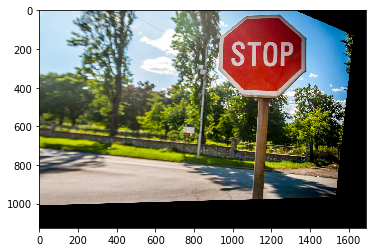

In [16]:
warped_img = warp(image)
plt.imshow(warped_img)

## Practice Problem
To do that, you need to write a function that takes your distorted image as input and completes the following steps:

Undistort the image using cv2.undistort() with mtx and dist
Convert to grayscale
Find the chessboard corners
Draw corners
Define 4 source points (the outer 4 corners detected in the chessboard pattern)
Define 4 destination points (must be listed in the same order as src points!)
Use cv2.getPerspectiveTransform() to get M, the transform matrix
use cv2.warpPerspective() to apply M and warp your image to a top-down view

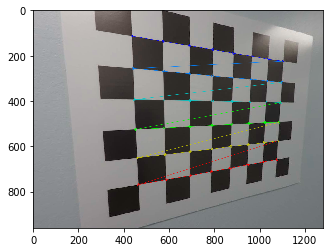

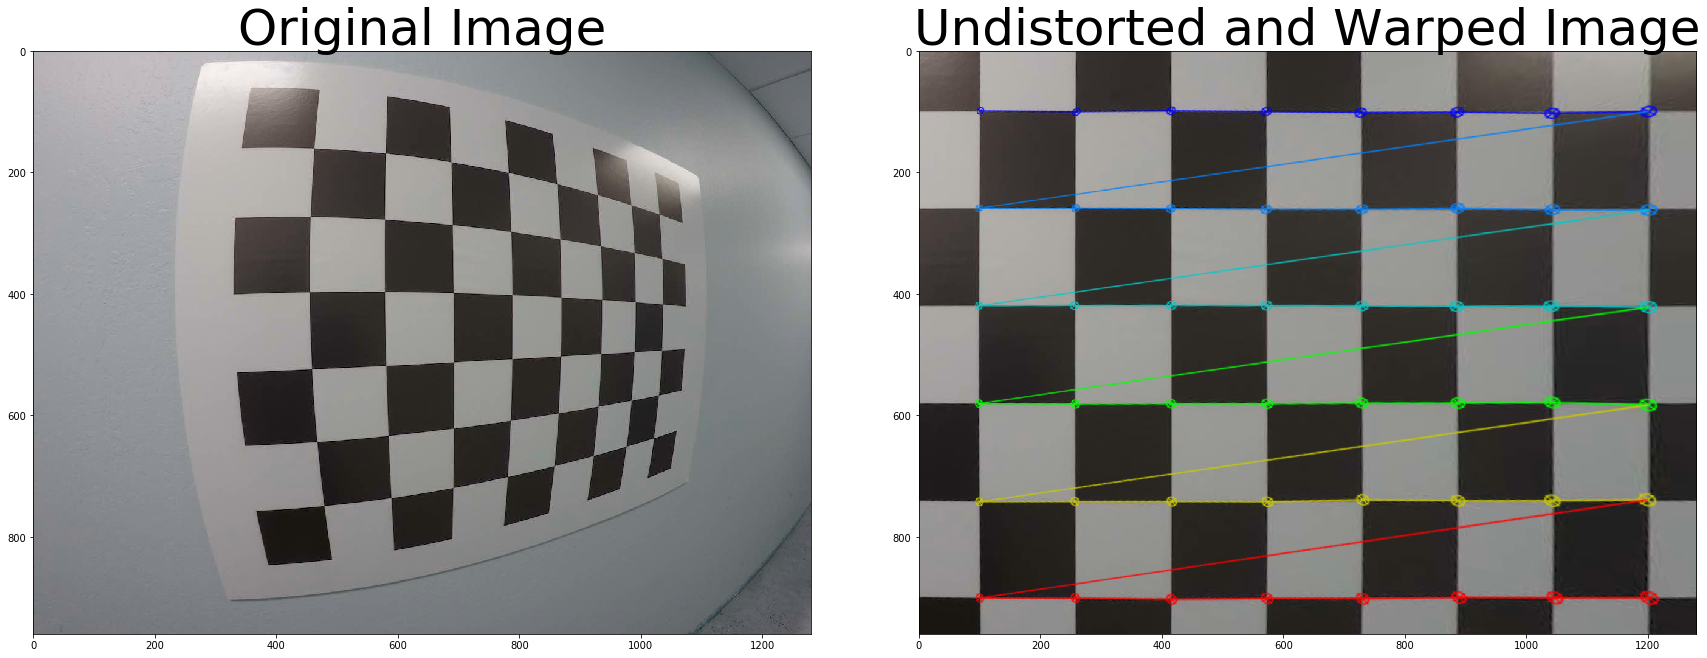

In [39]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

def corners_unwarp(img, nx, ny, mtx, dist):
    img_size = (img.shape[1], img.shape[0])
    
    M = None
    warped = np.copy(img)
    
    # 1) Undistort using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)

    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # 4) If corners found: 
    if ret:
        # a) draw corners
        cv2.drawChessboardCorners(undist, (8,6), corners, ret)
        plt.imshow(undist)
        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
        assert(len(corners) == nx*ny)
        src = np.float32([corners[0][0], corners[nx-1][0], corners[nx*ny-1][0], corners[nx*(ny-1)][0]])
        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        dst = np.float32([[100,100], [1200, 100], [1200, 900], [100, 900]])
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR)
    else:
        print('No corners found')
 
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
